# Labaratuarda numune karışımı
Adınız:Metin Can
Soyadınız:Nasıf
Okul Numaranız:2212721017
GitHub Repo Bağlantısı: https://github.com/metheen/genetik_optimizasyonu

Program çalışıyor...

--- SONUÇLAR ---
Reaktif A (x1): % 65.72
Reaktif B (x2): % 34.23
En Yüksek Skor: 1929.52
Toplam Oran: % 99.95


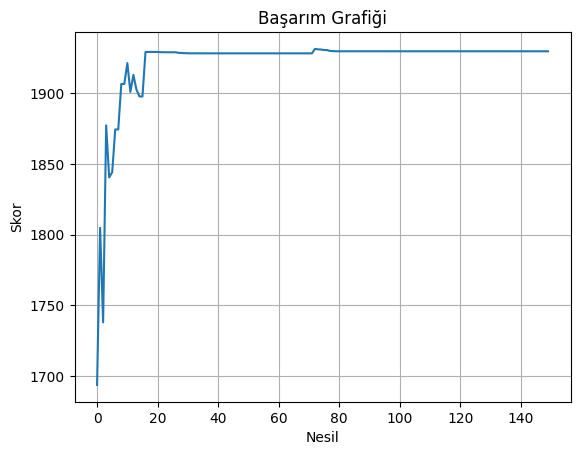

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- AYARLAR ---
POPULATION_SIZE = 50   # 50 farklı çözüm yarışacak
GENERATIONS = 150      # 150 tur boyunca evrimleşecekler
MUTATION_RATE = 0.1    # %10 ihtimalle gen değişimi (çeşitlilik için)
CROSSOVER_RATE = 0.8   # %80 ihtimalle anne-baba karışımı
BOUNDS = [(10, 80), (10, 80)] # Problemdeki %10-%80 sınırı

# --- AMAÇ VE KISITLAR ---
def fitness_function(individual):
    # Genleri alıyoruz (x1: Reaktif A, x2: Reaktif B)
    x1 = individual[0]
    x2 = individual[1]

    # KISIT 1: Reaktif A en az %25 olmalı
    if x1 < 25:
        return -9999 # Kuralı ihlal edene ceza verip eliyoruz (Ceza Yöntemi)

    # KISIT 2: Toplam karışım %100'ü geçemez
    if (x1 + x2) > 100:
        return -9999 # Sınırı aşan elenir

    # Formülü hesapla (Amaç: Bunu maksimize etmek)
    # y = 3x1 + 2x2 + x1*x2 - 0.5*x2^2
    score = 3*x1 + 2*x2 + (x1 * x2) - (0.5 * (x2**2))
    return score

# --- YARDIMCI FONKSİYONLAR ---

def create_individual():
    # Rastgele ondalıklı sayı (float) üretiyoruz (Reel Kodlama)
    x1 = random.uniform(BOUNDS[0][0], BOUNDS[0][1])
    x2 = random.uniform(BOUNDS[1][0], BOUNDS[1][1])
    return [x1, x2]

def create_population(size):
    # İlk başta rastgele 50 çözüm oluştur
    return [create_individual() for _ in range(size)]

def selection(population):
    # Turnuva Seçimi: Rastgele 2 kişi seç, iyisini al
    tournament = random.sample(population, 2)
    if fitness_function(tournament[0]) > fitness_function(tournament[1]):
        return tournament[0]
    else:
        return tournament[1]

def crossover(parent1, parent2):
    # Aritmetik Çaprazlama: Sayısal oldukları için ortalama alıyoruz
    if random.random() < CROSSOVER_RATE:
        alpha = random.random() # Karışım oranı

        # Formülle anne ve babayı karıştır
        c1_x1 = alpha * parent1[0] + (1-alpha) * parent2[0]
        c1_x2 = alpha * parent1[1] + (1-alpha) * parent2[1]

        c2_x1 = (1-alpha) * parent1[0] + alpha * parent2[0]
        c2_x2 = (1-alpha) * parent1[1] + alpha * parent2[1]

        return [c1_x1, c1_x2], [c2_x1, c2_x2]

    return parent1, parent2 # Çaprazlama olmazsa aynen kalsınlar

def mutation(individual):
    # Gaussian Mutasyon: Yerel tuzaklara takılmamak için ufak değişim
    if random.random() < MUTATION_RATE:
        gene_idx = random.randint(0, 1) # x1 veya x2'yi seç
        change = random.gauss(0, 5)     # Ufak bir sayı ekle

        individual[gene_idx] += change

        # Sınır dışına taşarsa düzelt (Clamping)
        individual[gene_idx] = max(BOUNDS[gene_idx][0], min(BOUNDS[gene_idx][1], individual[gene_idx]))

    return individual

# --- ANA DÖNGÜ (MAIN) ---

population = create_population(POPULATION_SIZE)
best_scores = [] # Grafiği çizmek için kayıt tutuyoruz

print("Program çalışıyor...")

for generation in range(GENERATIONS):
    new_population = []

    # Yeni nesli doldurana kadar döngü
    while len(new_population) < POPULATION_SIZE:
        p1 = selection(population) # Anne seç
        p2 = selection(population) # Baba seç

        c1, c2 = crossover(p1, p2) # Çocuk yap

        new_population.append(mutation(c1)) # Mutasyon ve ekle
        if len(new_population) < POPULATION_SIZE:
            new_population.append(mutation(c2))

    population = new_population # Nesli güncelle

    # En iyiyi kaydet
    best = max(population, key=fitness_function)
    best_scores.append(fitness_function(best))

# --- SONUÇLARI GÖSTER ---
best_final = max(population, key=fitness_function)

print("\n--- SONUÇLAR ---")
print(f"Reaktif A (x1): % {best_final[0]:.2f}")
print(f"Reaktif B (x2): % {best_final[1]:.2f}")
print(f"En Yüksek Skor: {fitness_function(best_final):.2f}")
print(f"Toplam Oran: % {best_final[0] + best_final[1]:.2f}")

# Grafik çiz
plt.plot(best_scores)
plt.title("Başarım Grafiği")
plt.xlabel("Nesil")
plt.ylabel("Skor")
plt.grid(True)
plt.show()